# library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras

# keras: for data processing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# keras: for Deep-learing
from keras.layers import *
from keras.models import *
from keras.activations import *
from keras.callbacks import EarlyStopping

/home/taeyong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/taeyong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# data processing

In [2]:
# data load
data = pd.read_csv('./data/uci_news_aggregator.csv', delimiter = ',', skiprows = 1,
                   names = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY',
                            'HOSTNAME', 'TIMESTAMP'], usecols=['TITLE', 'CATEGORY'])

In [3]:
data.head(5)

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [4]:
np.array(data).shape

(422419, 2)

In [5]:
# # remove punctuation and lowercase
# def normalize_text(s):
#     s = s.lower()
    
#     # remove punctuation that is not word-internal (e.g., hyphens, apostrophes)
#     s = re.sub('\s\W',' ',s)
#     s = re.sub('\W\s',' ',s)
    
#     # make sure we didn't introduce any double spaces
#     s = re.sub('\s+',' ',s)
    
#     return s

In [6]:
# news['TEXT'] = [normalize_text(s) for s in news['TITLE']]

# construct label

In [7]:
#  [1. 0. 0. 0.] e
#  [0. 1. 0. 0.] b
#  [0. 0. 1. 0.] t
#  [0. 0. 0. 1.] m

In [8]:
data.CATEGORY.value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

In [9]:
# data slicing
num_of_categories = 45000
shuffled = data.reindex(np.random.permutation(data.index))

e = shuffled[shuffled['CATEGORY'] == 'e'][:num_of_categories]
b = shuffled[shuffled['CATEGORY'] == 'b'][:num_of_categories]
t = shuffled[shuffled['CATEGORY'] == 't'][:num_of_categories]
m = shuffled[shuffled['CATEGORY'] == 'm'][:num_of_categories]

concated = pd.concat([e,b,t,m], ignore_index=True)

In [10]:
np.array(concated).shape

(180000, 2)

In [11]:
# label col
concated['LABEL'] = 0

In [12]:
concated.head(5)

,TITLE,CATEGORY,LABEL
0,'The Bachelorette:' Ghent out,e,0
1,Little girl doesn't want her baby brother to g...,e,0
2,Bachelorette Andi Dorfman Reacts To Eric Hill'...,e,0
3,My Big Fat Greek Wedding Sequel Is On,e,0
4,Rocky Reunion: Kendra Wilkinson and Husband Ha...,e,0


In [13]:
np.array(concated).shape

(180000, 3)

In [14]:
concated = concated.reindex(np.random.permutation(concated.index))

concated.loc[concated['CATEGORY'] == 'e', 'LABEL'] = 0
concated.loc[concated['CATEGORY'] == 'b', 'LABEL'] = 1
concated.loc[concated['CATEGORY'] == 't', 'LABEL'] = 2
concated.loc[concated['CATEGORY'] == 'm', 'LABEL'] = 3

In [15]:
concated['LABEL'][:10]

81249     1
50865     1
51925     1
42297     0
138909    3
127304    2
68645     1
57230     1
164987    3
38241     0
Name: LABEL, dtype: int64

In [16]:
# one-hot encoding
labels = to_categorical(concated['LABEL'], num_classes=4)

In [17]:
print(labels[:10])

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


# construct train & test dataset

In [18]:
n_most_common_words = 8000
max_len = 128

In [19]:
tokenizer = Tokenizer(num_words=n_most_common_words, char_level=True, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [20]:
concated['TITLE'].values

array(['Heroic Harvard Grad Invents 3D Printer for Eyeshadows and Lipsticks',
       'Rothman: Yet Another Crazy Conservative Conspiracy Theory Proven Correct',
       'Business as usual?', ...,
       'U.S. Economy Grew by a 4% Annual Pace in the Second Quarter',
       'Investor Sentiment on Tech Goes From Giddy to Glum',
       'La Quinta Prices IPO Below Range'], dtype=object)

In [21]:
tokenizer.fit_on_texts(concated['TITLE'].values)

In [22]:
sequences = tokenizer.texts_to_sequences(concated['TITLE'].values)

In [23]:
sequences[:10]

[[41,
  2,
  8,
  4,
  6,
  12,
  1,
  41,
  3,
  8,
  27,
  3,
  8,
  11,
  1,
  38,
  8,
  3,
  11,
  1,
  39,
  9,
  27,
  2,
  9,
  7,
  5,
  1,
  59,
  33,
  1,
  32,
  8,
  6,
  9,
  7,
  2,
  8,
  1,
  18,
  4,
  8,
  1,
  37,
  19,
  2,
  5,
  13,
  3,
  11,
  4,
  22,
  5,
  1,
  3,
  9,
  11,
  1,
  46,
  6,
  17,
  5,
  7,
  6,
  12,
  25,
  5],
 [35,
  4,
  7,
  13,
  16,
  3,
  9,
  44,
  1,
  57,
  2,
  7,
  1,
  24,
  9,
  4,
  7,
  13,
  2,
  8,
  1,
  28,
  8,
  3,
  55,
  19,
  1,
  28,
  4,
  9,
  5,
  2,
  8,
  27,
  3,
  7,
  6,
  27,
  2,
  1,
  28,
  4,
  9,
  5,
  17,
  6,
  8,
  3,
  12,
  19,
  1,
  29,
  13,
  2,
  4,
  8,
  19,
  1,
  32,
  8,
  4,
  27,
  2,
  9,
  1,
  28,
  4,
  8,
  8,
  2,
  12,
  7],
 [31, 14, 5, 6, 9, 2, 5, 5, 1, 3, 5, 1, 14, 5, 14, 3, 10, 61],
 [32,
  6,
  17,
  17,
  3,
  1,
  30,
  6,
  11,
  11,
  10,
  2,
  7,
  4,
  9,
  1,
  6,
  9,
  7,
  2,
  8,
  27,
  6,
  2,
  22,
  44,
  1,
  35,
  4,
  19,
  3,
  10,
  1,
  21,
  8,
  6,

In [24]:
word_index = tokenizer.word_index

In [25]:
word_index

{' ': 1,
 'e': 2,
 'a': 3,
 'o': 4,
 's': 5,
 'i': 6,
 't': 7,
 'r': 8,
 'n': 9,
 'l': 10,
 'd': 11,
 'c': 12,
 'h': 13,
 'u': 14,
 'g': 15,
 'm': 16,
 'p': 17,
 'f': 18,
 'y': 19,
 'S': 20,
 'b': 21,
 'w': 22,
 '.': 23,
 'A': 24,
 'k': 25,
 "'": 26,
 'v': 27,
 'C': 28,
 'T': 29,
 'M': 30,
 'B': 31,
 'P': 32,
 'D': 33,
 'F': 34,
 'R': 35,
 'W': 36,
 'E': 37,
 'G': 38,
 'I': 39,
 'O': 40,
 'H': 41,
 ',': 42,
 'N': 43,
 ':': 44,
 '-': 45,
 'L': 46,
 '0': 47,
 'U': 48,
 'x': 49,
 '1': 50,
 'K': 51,
 '2': 52,
 'J': 53,
 'V': 54,
 'z': 55,
 '4': 56,
 'Y': 57,
 '5': 58,
 '3': 59,
 'j': 60,
 '?': 61,
 '$': 62,
 'q': 63,
 '7': 64,
 '8': 65,
 '(': 66,
 '6': 67,
 ')': 68,
 '9': 69,
 'X': 70,
 '"': 71,
 '&': 72,
 'Q': 73,
 'Z': 74,
 ';': 75,
 '!': 76,
 '/': 77,
 '%': 78,
 '–': 79,
 '“': 80,
 '”': 81,
 '—': 82,
 '[': 83,
 ']': 84,
 '+': 85,
 '#': 86,
 '\t': 87,
 'é': 88,
 '|': 89,
 '£': 90,
 '…': 91,
 '`': 92,
 '»': 93,
 '′': 94,
 '*': 95,
 '>': 96,
 '€': 97,
 '\u200b': 98,
 '\n': 99,
 '@': 100,
 

In [26]:
X = pad_sequences(sequences, maxlen=max_len)

In [27]:
print(X.shape)
print(labels.shape)

(180000, 128)
(180000, 4)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.2, random_state=42)

In [29]:
# X_train = np.expand_dims(X_train, -1)
# X_test = np.expand_dims(X_test, -1)
# y_train = np.expand_dims(X_train, -1)
# y_test = np.expand_dims(X_test, -1)

In [30]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((144000, 128), (144000, 4), (36000, 128), (36000, 4))


# model

In [31]:
# model param
emb_dim = 128

In [32]:
def get_model():
    inp = Input(shape=(max_len,))
    emb = Embedding(n_most_common_words, emb_dim, input_length=max_len)(inp)
    _ = Dropout(0.2)(emb)
    _ = Conv1D(256, 3, padding='valid', activation='relu', strides=1)(_)
    _ = GlobalMaxPooling1D()(_)
    _ = Dense(128, activation='relu')(_)
    _ = Dropout(0.2)(_)
    out = Dense(4, activation='softmax')(_)
    
    return Model(inp, out)

In [33]:
model = get_model()

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 128, 128)          1024000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 126, 256)          98560     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

# train

In [35]:
# train param
epochs = 15
batch_size = 64

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [37]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Train on 115200 samples, validate on 28800 samples
Epoch 1/15
115200/115200 [==============================] - 22s 189us/step - loss: 0.7433 - acc: 0.7076 - val_loss: 0.6149 - val_acc: 0.7743
Epoch 2/15
115200/115200 [==============================] - 17s 147us/step - loss: 0.5239 - acc: 0.8079 - val_loss: 0.4690 - val_acc: 0.8293
Epoch 3/15
115200/115200 [==============================] - 17s 148us/step - loss: 0.4689 - acc: 0.8293 - val_loss: 0.4192 - val_acc: 0.8489
Epoch 4/15
115200/115200 [==============================] - 17s 148us/step - loss: 0.4334 - acc: 0.8423 - val_loss: 0.4379 - val_acc: 0.8397
Epoch 5/15
115200/115200 [==============================] - 17s 148us/step - loss: 0.4094 - acc: 0.8515 - val_loss: 0.3897 - val_acc: 0.8580
Epoch 6/15
115200/115200 [==============================] - 17s 152us/step - loss: 0.3917 - acc: 0.8585 - val_loss: 0.3868 - val_acc: 0.8592
Epoch 7/15
115200/115200 [==============================] - 17s 152us/step - loss: 0.3778 - acc: 0.8627

In [38]:
model.save('model.h5')

# test

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

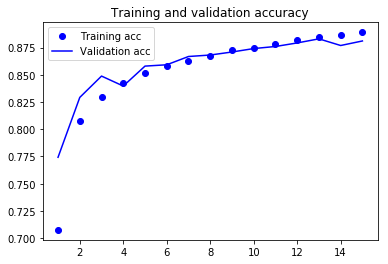

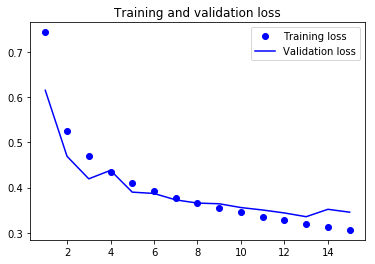

In [40]:
# visualization
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
# test

labels = ['entertainment', 'bussiness', 'science/tech', 'health']
txt_list = [["Regular fast food eating linked to fertility issues in women"], ["Chinese ethnic group biggest earners in the UK"],
           ["Dozens of arrests in Copenhagen for drunk scooter driving"]]

for txt in txt_list:
    print(txt)
    sequence = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(sequence, maxlen=max_len)
    pred = model.predict(padded)
    print(pred, labels[np.argmax(pred)])

['Regular fast food eating linked to fertility issues in women']
[[3.6170029e-05 3.4474377e-03 3.2855687e-04 9.9618787e-01]] health
['Chinese ethnic group biggest earners in the UK']
[[0.00413303 0.87792736 0.06605796 0.05188173]] bussiness
['Dozens of arrests in Copenhagen for drunk scooter driving']
[[0.6409137  0.02368361 0.10001311 0.23538953]] entertainment
